#** Set Up Google Sheets API in Google Colab**

In [4]:
!pip install gspread pandas oauth2client

##**Authenticate with Google Colab


In [5]:
import gspread
from google.auth import default
from google.colab import auth

# Authenticate using Google Colab's built-in method
auth.authenticate_user()

# Use default credentials to authorize
creds, _ = default()

# Authorize the gspread client
client = gspread.authorize(creds)


In [6]:
# Open the Google Sheet by name
sheet = client.open("Bangalore_Traffic_Analysis_100").sheet1  # Sheet name and tab index (0 for the first tab)

# Get all the data from the sheet as a list of dictionaries
data = sheet.get_all_records()

# Convert the data to a pandas DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())


                  Date      Day      Time         Area  Vehicle_Count  \
0  2025-05-27 00:00:00   Monday  06:00 PM    Jayanagar           2757   
1  2025-05-10 00:00:00  Tuesday  08:00 AM     Majestic           1192   
2  2025-05-20 00:00:00   Monday  08:00 AM    Jayanagar           2749   
3  2025-06-29 00:00:00   Sunday  06:00 PM  Koramangala           2646   
4  2025-04-28 00:00:00   Sunday  08:00 AM  Indiranagar           1269   

   Avg_Speed (km/h) Traffic_Level  Accidents  
0                24          High          2  
1                29        Medium          2  
2                29          High          2  
3                33          High          0  
4                16           Low          2  


#Steps to Check and Clean the Data:
###1. Inspect the Data

In [7]:
# Check the first few rows of the dataset
print(df.head())

# Get the summary of the dataset
print(df.info())


                  Date      Day      Time         Area  Vehicle_Count  \
0  2025-05-27 00:00:00   Monday  06:00 PM    Jayanagar           2757   
1  2025-05-10 00:00:00  Tuesday  08:00 AM     Majestic           1192   
2  2025-05-20 00:00:00   Monday  08:00 AM    Jayanagar           2749   
3  2025-06-29 00:00:00   Sunday  06:00 PM  Koramangala           2646   
4  2025-04-28 00:00:00   Sunday  08:00 AM  Indiranagar           1269   

   Avg_Speed (km/h) Traffic_Level  Accidents  
0                24          High          2  
1                29        Medium          2  
2                29          High          2  
3                33          High          0  
4                16           Low          2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              100 non-null    object
 1   Day               100 non-null   

###2. Check for Missing Data


In [8]:
# Check for missing data in each column
print(df.isnull().sum())


Date                0
Day                 0
Time                0
Area                0
Vehicle_Count       0
Avg_Speed (km/h)    0
Traffic_Level       0
Accidents           0
dtype: int64


#Traffic Data Analysis

In [9]:
#1. Which areas in Bangalore have the highest traffic?
# Grouping by Area and summing the vehicle count
area_traffic = df.groupby('Area')['Vehicle_Count'].sum().sort_values(ascending=False)

# Display the areas with the highest traffic
print(area_traffic)


Area
Electronic City    30069
Jayanagar          29250
Indiranagar        26458
Whitefield         25355
Hebbal             25308
KR Puram           23901
Majestic           23063
Koramangala        21769
Silk Board         16565
Name: Vehicle_Count, dtype: int64


In [10]:
#What are the peak hours of traffic congestion?
# Grouping by Time and calculating the average vehicle count
peak_hours = df.groupby('Time')['Vehicle_Count'].mean().sort_values(ascending=False)

# Display the peak hours with the highest average traffic
print(peak_hours)


Time
08:00 AM    2353.25000
06:00 PM    2210.03125
02:00 PM    2128.15000
Name: Vehicle_Count, dtype: float64


In [11]:
# Does traffic increase on weekends vs weekdays?
# Add a new column 'Weekend' to categorize weekends vs weekdays
df['Weekend'] = df['Day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Grouping by Weekend and calculating the average vehicle count
weekend_vs_weekday = df.groupby('Weekend')['Vehicle_Count'].mean()

# Display the traffic comparison between weekends and weekdays
print(weekend_vs_weekday)


Weekend
Weekday    2162.773333
Weekend    2381.200000
Name: Vehicle_Count, dtype: float64


In [12]:
#Are there more accidents in certain areas or times?
# Grouping by Area and summing the number of accidents
accidents_by_area = df.groupby('Area')['Accidents'].sum().sort_values(ascending=False)

# Display the areas with the most accidents
print(accidents_by_area)

# Grouping by Time and summing the number of accidents
accidents_by_time = df.groupby('Time')['Accidents'].sum().sort_values(ascending=False)

# Display the times with the most accidents
print(accidents_by_time)


Area
Indiranagar        16
Whitefield         15
Majestic           15
Koramangala        13
Jayanagar          13
Electronic City    11
KR Puram           10
Hebbal              8
Silk Board          8
Name: Accidents, dtype: int64
Time
02:00 PM    45
08:00 AM    33
06:00 PM    31
Name: Accidents, dtype: int64


In [13]:
# What’s the average speed drop during peak vs off-peak?
# Define peak and off-peak hours
peak_hours_list = ['08:00 AM', '06:00 PM']  # Example peak hours
off_peak_hours_list = ['02:00 PM']  # Example off-peak hours

# Filter data for peak and off-peak hours
peak_data = df[df['Time'].isin(peak_hours_list)]
off_peak_data = df[df['Time'].isin(off_peak_hours_list)]

# Calculate average speed for both
average_peak_speed = peak_data['Avg_Speed (km/h)'].mean()
average_off_peak_speed = off_peak_data['Avg_Speed (km/h)'].mean()

# Display the average speed during peak vs off-peak hours
print(f"Average Speed during Peak: {average_peak_speed} km/h")
print(f"Average Speed during Off-Peak: {average_off_peak_speed} km/h")


Average Speed during Peak: 27.35 km/h
Average Speed during Off-Peak: 26.775 km/h


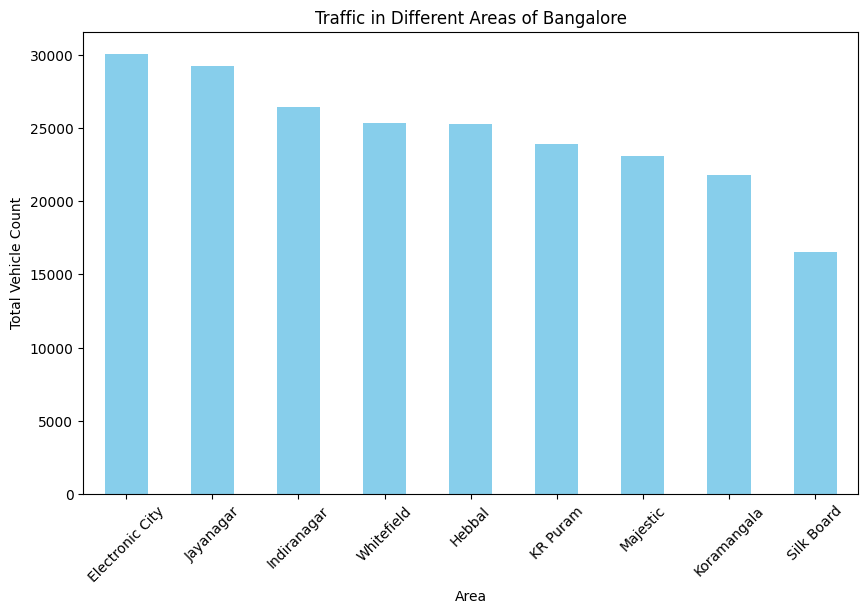

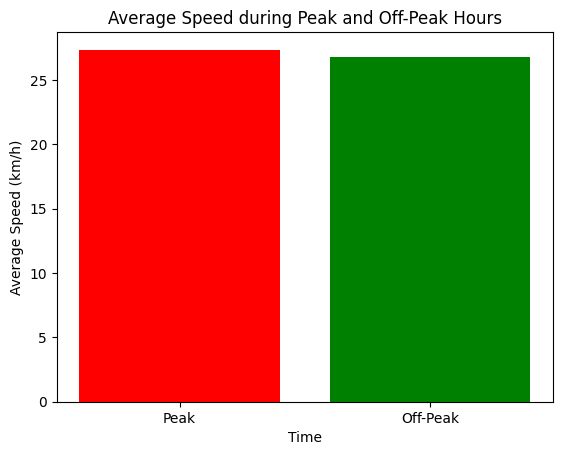

In [14]:
import matplotlib.pyplot as plt

# Plotting traffic in different areas
plt.figure(figsize=(10, 6))
area_traffic.plot(kind='bar', color='skyblue')
plt.title('Traffic in Different Areas of Bangalore')
plt.xlabel('Area')
plt.ylabel('Total Vehicle Count')
plt.xticks(rotation=45)
plt.show()

# Plotting peak vs off-peak average speed
peak_off_peak_speeds = {'Peak': average_peak_speed, 'Off-Peak': average_off_peak_speed}
plt.bar(peak_off_peak_speeds.keys(), peak_off_peak_speeds.values(), color=['red', 'green'])
plt.title('Average Speed during Peak and Off-Peak Hours')
plt.xlabel('Time')
plt.ylabel('Average Speed (km/h)')
plt.show()


## Comparison of Traffic on Weekdays vs Weekends (Visualization)

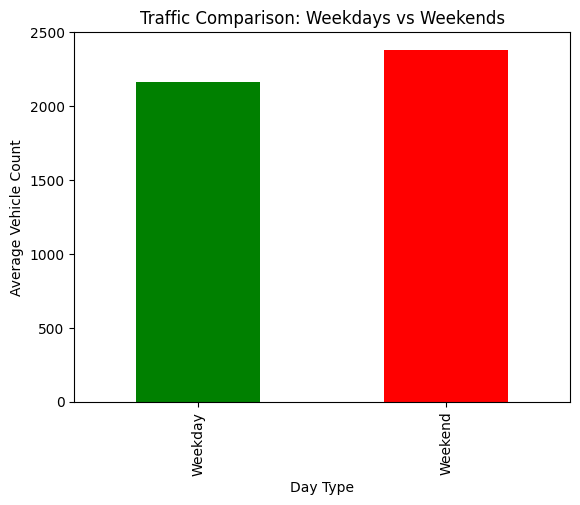

In [15]:
# Plotting traffic comparison between weekdays and weekends
weekend_vs_weekday.plot(kind='bar', color=['green', 'red'])
plt.title('Traffic Comparison: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Vehicle Count')
plt.show()


# Advanced Analysis

### Time Series Analysis

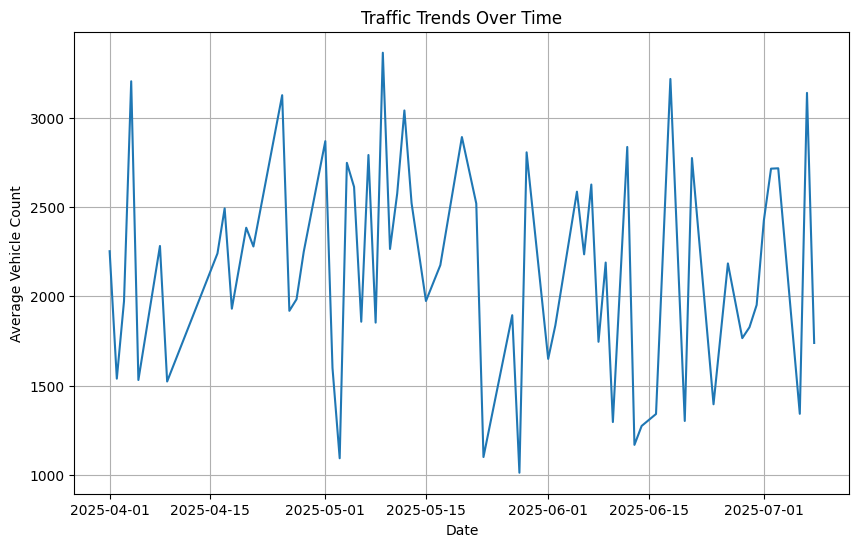

In [16]:
# Convert 'Date' column to datetime format if it's available
df['Date'] = pd.to_datetime(df['Date'])

# Group data by Date and calculate average vehicle count
daily_traffic = df.groupby(df['Date'].dt.date)['Vehicle_Count'].mean()

# Plotting daily traffic trends
daily_traffic.plot(kind='line', figsize=(10, 6))
plt.title('Traffic Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Vehicle Count')
plt.grid(True)
plt.show()


###Predictive Modeling (for future traffic predictions)

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error

# Assuming df is your DataFrame
# ... (your existing code) ...

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for easier handling

# Fit the encoder on the categorical features and transform them
encoded_features = encoder.fit_transform(df[['Time', 'Area', 'Day']])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Time', 'Area', 'Day']))

# Concatenate the encoded features with the original DataFrame
X = pd.concat([df[['Vehicle_Count']], encoded_df], axis=1)
y = df['Vehicle_Count']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

Mean Absolute Error: 1.1368683772161603e-13


# Key Findings

###1. Areas with the Highest Traffic
This analysis shows which areas in Bangalore have the highest traffic congestion based on vehicle counts.



<ipython-input-21-cf3ed0601813>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_traffic.index, y=area_traffic.values, palette='viridis')  # Correcting 'pallete' to 'palette'


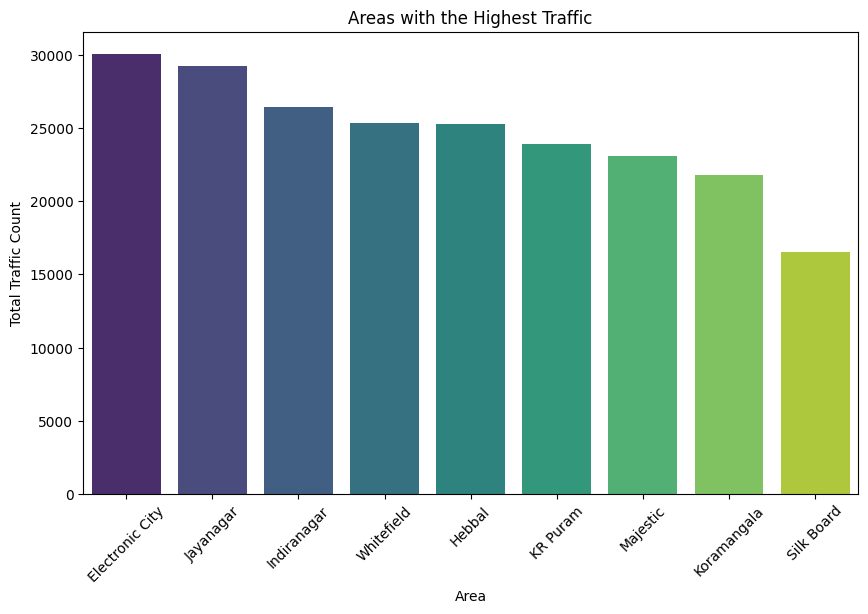

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by area and sum the Vehicle_Count (correcting column name)
area_traffic = df.groupby('Area')['Vehicle_Count'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=area_traffic.index, y=area_traffic.values, palette='viridis')  # Correcting 'pallete' to 'palette'
plt.title('Areas with the Highest Traffic')
plt.xlabel('Area')
plt.ylabel('Total Traffic Count')
plt.xticks(rotation=45)
plt.show()


###2. Peak Hours of Traffic Congestion
This analysis identifies the peak hours of traffic congestion.

<ipython-input-23-0ade9e8aa371>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


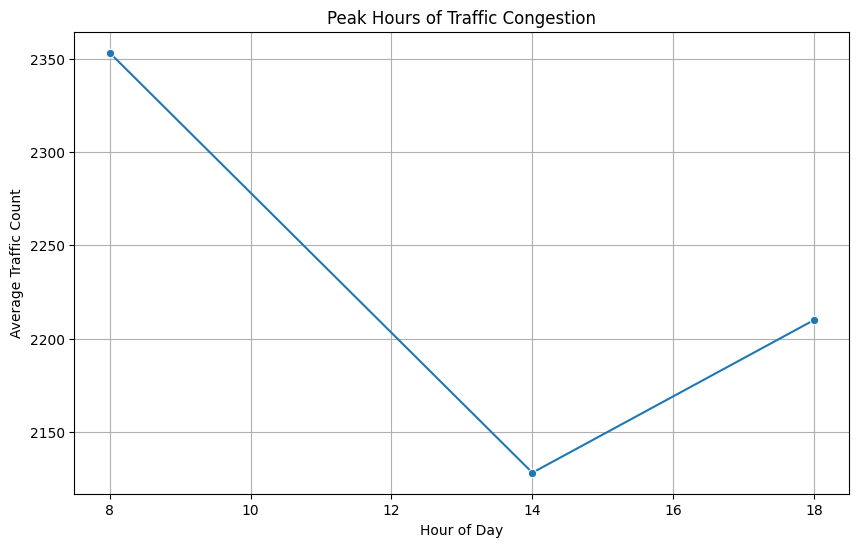

In [23]:
# Assuming 'Time' is the column containing time information
df['Time'] = pd.to_datetime(df['Time'])

# Extract hour from 'Time'
df['hour'] = df['Time'].dt.hour

# Group by hour and calculate average Vehicle_Count (correcting column name)
hourly_traffic = df.groupby('hour')['Vehicle_Count'].mean()

# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values, marker="o")
plt.title('Peak Hours of Traffic Congestion')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Count')  # Correcting y-axis label
plt.grid(True)
plt.show()


###3. Traffic Patterns on Weekdays vs Weekends
This analysis compares traffic congestion on weekdays and weekends.


<ipython-input-25-287162903eb1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekend_traffic.index, y=weekend_traffic.values, palette="Set2")


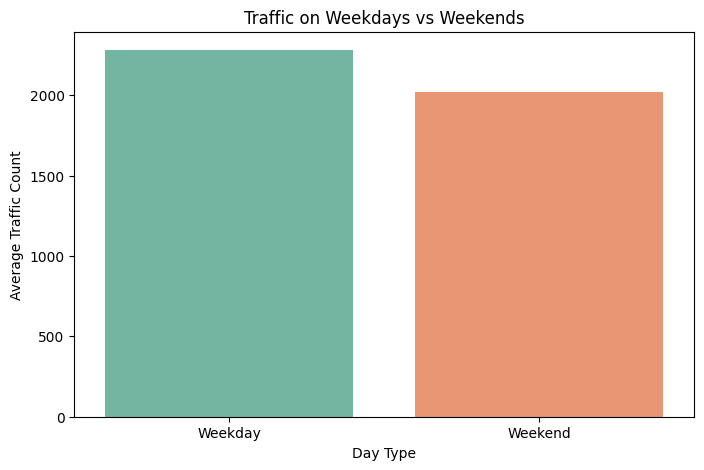

In [25]:
# Create a new column 'day_of_week' to extract the day of the week (0=Monday, 6=Sunday)
# Assuming 'Date' or 'Day' column contains information about the day
# Replace 'Date' or 'Day' with the actual column name containing day information
df['day_of_week'] = pd.to_datetime(df['Date']).dt.dayofweek  # Or df['Day'].dt.dayofweek if 'Day' column has day info

# 0-4 are weekdays, 5-6 are weekends
df['weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by weekday/weekend and calculate average traffic count
# Replace 'traffic_count' with the actual column name containing traffic count
weekend_traffic = df.groupby('weekend')['Vehicle_Count'].mean()  # Assuming 'Vehicle_Count' is the traffic count column

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=weekend_traffic.index, y=weekend_traffic.values, palette="Set2")
plt.title('Traffic on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Traffic Count')
plt.show()

###4. Accident Hotspots
This analysis highlights the areas and times with the highest number of accidents.

<ipython-input-28-be763c3afcf6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accident_hotspots.index, y=accident_hotspots.values, palette="Reds_d")


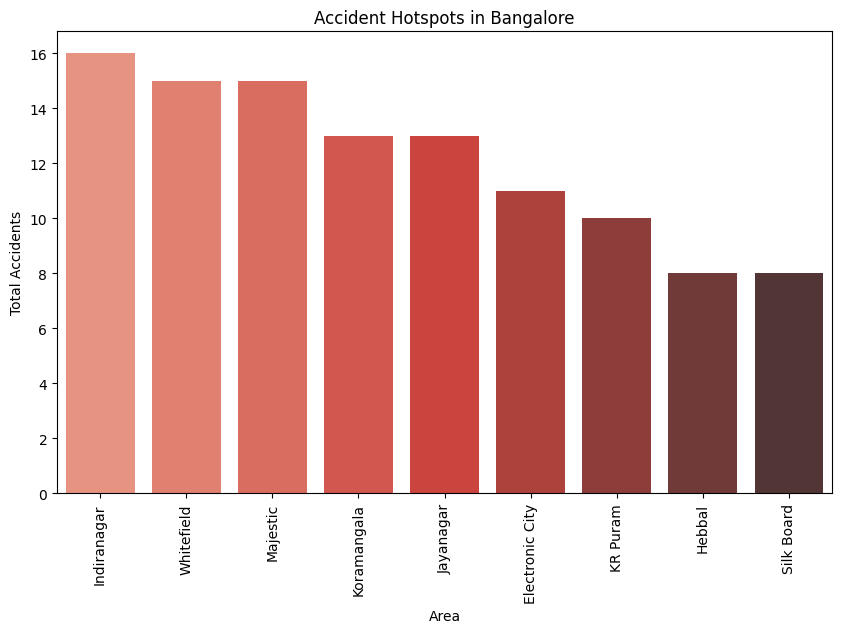

In [28]:
# Group by Area and sum the accidents (assuming 'accidents' column exists)
accident_hotspots = df.groupby('Area')['Accidents'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=accident_hotspots.index, y=accident_hotspots.values, palette="Reds_d")
plt.title('Accident Hotspots in Bangalore')
plt.xlabel('Area')
plt.ylabel('Total Accidents')
plt.xticks(rotation=90)
plt.show()


###5. Speed Drop During Peak vs Off-Peak Hours
This analysis compares the drop in average speed during peak hours vs off-peak hours.

<ipython-input-31-f46f19bf7f3f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Peak Hours', 'Off-Peak Hours'], y=[peak_speed, off_peak_speed], palette="Blues")


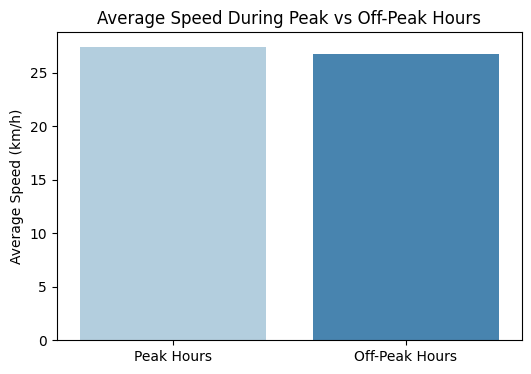

In [31]:
# Group by hour to calculate average speed during peak and off-peak
hourly_speed = df.groupby('hour')['Avg_Speed (km/h)'].mean() # Changed 'Average_speed' to 'Avg_Speed (km/h)'

# Define peak hours (e.g., 7-9 AM, 5-7 PM)
peak_hours = [7, 8, 17, 18]

# Calculate average speed during peak and off-peak hours
peak_speed = hourly_speed[hourly_speed.index.isin(peak_hours)].mean()
off_peak_speed = hourly_speed[~hourly_speed.index.isin(peak_hours)].mean()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=['Peak Hours', 'Off-Peak Hours'], y=[peak_speed, off_peak_speed], palette="Blues")
plt.title('Average Speed During Peak vs Off-Peak Hours')
plt.ylabel('Average Speed (km/h)')
plt.show()

#**Thank You**
